In [3]:
from math import sqrt
import numpy as np
from matplotlib import pylab as plt

In [4]:

def bisection(f,a,b,N):
    '''
    https://www.math.ubc.ca/~pwalls/math-python/roots-optimization/bisection/
    Approximate solution of f(x)=0 on interval [a,b] by the bisection method.

    Parameters
    ----------
    f : function
        The function for which we are trying to approximate a solution f(x)=0.
    a,b : numbers
        The interval in which to search for a solution. The function returns
        None if f(a)*f(b) >= 0 since a solution is not guaranteed.
    N : (positive) integer
        The number of iterations to implement.

    Returns
    -------
    x_N : number
        The midpoint of the Nth interval computed by the bisection method. The
        initial interval [a_0,b_0] is given by [a,b]. If f(m_n) == 0 for some
        midpoint m_n = (a_n + b_n)/2, then the function returns this solution.
        If all signs of values f(a_n), f(b_n) and f(m_n) are the same at any
        iteration, the bisection method fails and return None.

    Examples
    --------
    >>> f = lambda x: x**2 - x - 1
    >>> bisection(f,1,2,25)
    1.618033990263939
    >>> f = lambda x: (2*x - 1)*(x - 3)
    >>> bisection(f,0,1,10)
    0.5
    '''
    if f(a)*f(b) >= 0:
        print("Bisection method fails.")
        return None
    a_n = a
    b_n = b
    for n in range(1,N+1):
        m_n = (a_n + b_n)/2
        f_m_n = f(m_n)
        if f(a_n)*f_m_n < 0:
            a_n = a_n
            b_n = m_n
        elif f(b_n)*f_m_n < 0:
            a_n = m_n
            b_n = b_n
        elif f_m_n == 0:
            print("Found exact solution.")
            return m_n
        else:
            print("Bisection method fails.")
            return None
    return (a_n + b_n)/2

# Finds value of y for a given x using step size h 
# and initial value y0 at x0. 
def rungeKutta(x0, y0, x, h, arg, dydx):
    """
    https://www.geeksforgeeks.org/runge-kutta-4th-order-method-solve-differential-equation/
    """
    # Count number of iterations using step size or 
    # step height h 
    n = (int)((x - x0)/h)  
    # Iterate for number of iterations 
    y = y0 
    for i in range(1, n + 1): 
        "Apply Runge Kutta Formulas to find next value of y"
        k1 = h * dydx(x0, y, arg) 
        k2 = h * dydx(x0 + 0.5 * h, y + 0.5 * k1, arg) 
        k3 = h * dydx(x0 + 0.5 * h, y + 0.5 * k2, arg) 
        k4 = h * dydx(x0 + h, y + k3, arg) 
  
        # Update next value of y 
        y = y + (1.0 / 6.0)*(k1 + 2 * k2 + 2 * k3 + k4) 
  
        # Update next value of x 
        x0 = x0 + h 
    return y 

In [5]:
def dadt(t, a,  a0half, OmegaR0=1e-5, OmegaM0=-1e-5+0.3, OmegaK0=0., OmegaLambda0=0.7):
    """
     https://en.wikipedia.org/wiki/Friedmann_equations
    """
    if OmegaK0 <0. and a> a0half:
        return -sqrt(OmegaR0/(a*a)+OmegaM0/a+OmegaK0+OmegaLambda0*a*a)
    else:
        return sqrt(OmegaR0/(a*a)+OmegaM0/a+OmegaK0+OmegaLambda0*a*a)
    
def aMid(a, OmegaR0=1e-5,  OmegaM0=-1e-5+1.1, OmegaK0=-0.1, OmegaLambda0=0.):
    """
    Exercise: 
        For OmegaK0<0 use this to find the maximum value a(t=tmax) can take. Use negative 
        square root in the integrand for t>tmax to.
    """
    return OmegaR0/(a*a)+OmegaM0/a+OmegaK0+OmegaLambda0*a*a



In [6]:
#x0 = 0
#y = 1
#x = 2
#h = 0.2
#print('The value of y at x is:', rungeKutta(x0, y, x, h))
a0Mid = bisection(aMid, 1e-5,20.,1000)/2.
print(a0Mid)
print(aMid(a0Mid*2.))

Found exact solution.
5.499954545492112
0.0


In [7]:
t_init=1e-4#1e-7
OmegaR0=1e-5
a_init=sqrt(2.*sqrt(OmegaR0)*t_init)
h=t_init/2.
t_next=t_init*2.


In [9]:
a_init

0.0007952707287670507

In [10]:
rungeKutta(t_init, a_init, t_next, h, a0Mid, dadt)

0.002233795950365733

In [11]:
t_vals = np.linspace(t_init,1.1,10000)

In [12]:
a_vals = []

In [13]:
for t in t_vals:
    a_vals.append(rungeKutta(t_init, a_init, t, h, a0Mid, dadt))
    a_init = a_vals[-1]
    t_init = t
print("done")

done


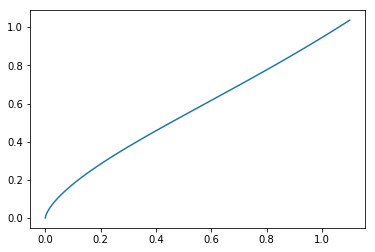

In [14]:
fig, ax = plt.subplots()
ax.plot(t_vals, a_vals)
#ax.set_yscale('log')
#ax.set_xscale('log')